# Making a perceptron from scratch and testing its accuracy!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=None)

In [4]:
print(X.shape)
print(y.shape)

(500, 2)
(500,)


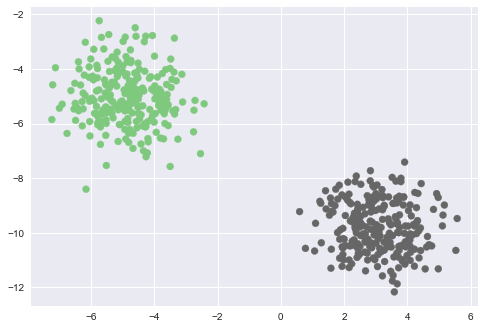

In [5]:
plt.style.use("seaborn")
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Accent)
plt.show()

# Helper Functions

In [6]:
def sigmoid(z):
    return (1.0)/(1.0+np.exp(-z))

In [7]:
z = np.array([1,2,3,4,5])
sigmoid(z)

array([0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715])

# Main perceptron algo
1. learn weights
2. reduce loss/ log loss/ binary cross entropy
3. make predicitons 

In [8]:
def predict(X, weights):
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    return predictions 

def loss(X, Y, weights):
    Y_ = predict(X, weights)
    cost = np.mean(-Y*np.log(Y_)-(1-Y)*np.log(1-Y_))
    return cost

def update(X, Y, weights, learning_rate):
    Y_ = predict(X, weights)
    dw = np.dot(X.T, Y_ - Y)
    
    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    return weights
    
#In the training rule, I have appended the bias to the x matrix which changes the dimension from mXn to mX(n+1)
    
def train(X, Y, learning_rate=0.5, maxEpochs=100):
    
    ones = np.ones((X.shape[0], 1))
    X = np.hstack((ones, X))
    
    weights = np.zeros(X.shape[1])
    
    for epoch in range(maxEpochs):
        weights = update(X, Y, weights, learning_rate)
        if epoch%10==0:
            l =  loss(X,Y,weights)
            print("Epoch %d Loss %.4f"%(epoch,l))

    return weights

In [22]:
weights = train(X,y,maxEpochs=200)

Epoch 0 Loss 0.1168
Epoch 10 Loss 0.0068
Epoch 20 Loss 0.0051
Epoch 30 Loss 0.0041
Epoch 40 Loss 0.0035
Epoch 50 Loss 0.0030
Epoch 60 Loss 0.0027
Epoch 70 Loss 0.0024
Epoch 80 Loss 0.0022
Epoch 90 Loss 0.0020
Epoch 100 Loss 0.0019
Epoch 110 Loss 0.0017
Epoch 120 Loss 0.0016
Epoch 130 Loss 0.0015
Epoch 140 Loss 0.0014
Epoch 150 Loss 0.0014
Epoch 160 Loss 0.0013
Epoch 170 Loss 0.0012
Epoch 180 Loss 0.0012
Epoch 190 Loss 0.0011


In [29]:
def getpred(X_Test, weights, labels=True):
    if X_Test.shape[1]!=weights.shape[0]:
        ones = np.ones((X_Test.shape[0],1))
        X_Test = np.hstack((ones, X_Test))
    probs = predict(X_Test, weights)
    
    if not labels:
        return probs 
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5] = 1
        return labels

In [30]:
weights

array([-0.12482901,  1.96357991, -0.27531833])

In [31]:
x1 = np.linspace(-8,2,10)
print(x1)

x2 = -(weights[0]+weights[1]*x1)/weights[2]
print(x2)

[-8.         -6.88888889 -5.77777778 -4.66666667 -3.55555556 -2.44444444
 -1.33333333 -0.22222222  0.88888889  2.        ]
[-57.50967675 -49.58519371 -41.66071066 -33.73622761 -25.81174457
 -17.88726152  -9.96277847  -2.03829543   5.88618762  13.81067067]


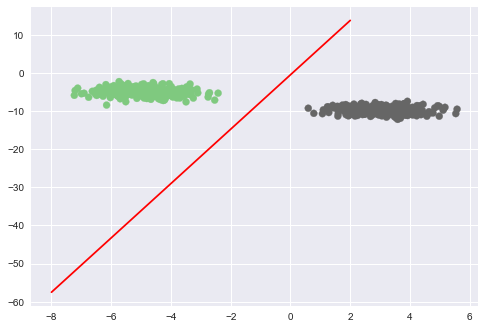

In [32]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Accent)
plt.plot(x1,x2,c='r')
plt.show()

## It is 100% - pretty evident from the dataset because of its linearity 

In [39]:
Y_ = getpred(X, weights, labels=True)
np.sum(Y_==y)*100/y.shape[0]

100.0